In [1]:
import pandas as pd


In [2]:
raw = pd.read_excel('11111111.xlsx')
raw['Ticker'] = raw['Ticker'].str.replace(" US",'');

In [3]:
raw.head()
raw['Date'] = pd.to_datetime(raw['Date'])

In [4]:
raw.head()

,Name,Ticker,Date,Period,Actual,Estimate,Surprise,Description,Sales Estimate
0,3M Co,MMM,2019-10-24 06:30:00,Q3 19,2.58,2.492,3.3,Q3 2019 Earnings Release,NaN
1,3M Co,MMM,2019-07-25 06:30:00,Q2 19,2.20,2.053,7.2,Q2 2019 Earnings Release,NaN
2,Kroger Co/The,KR,2018-06-21 08:01:00,Q1 19,0.73,0.633,15.3,Q1 2019 Earnings Release,NaN
3,3M Co,MMM,2019-01-29 06:30:00,Q4 18,2.31,2.276,1.5,Q4 2018 Earnings Release,NaN
4,3M Co,MMM,2018-10-23 07:30:00,Q3 18,2.58,2.702,-4.5,Q3 2018 Earnings Release,NaN


In [5]:
raw['Period'][0]

'Q3 19 '

In [6]:
mQ119 = raw['Period'] == "Q1 19 "
m2019 = raw['Date'].dt.year == 2019
df1 = raw[mQ119&m2019]
part1 = df1[ ['Ticker', 'Date','Actual', 'Estimate']]

In [7]:
part1.columns

Index(['Ticker', 'Date', 'Actual', 'Estimate'], dtype='object')

In [8]:
part1_names = df1.Name.value_counts().index
# mask_othername = raw['Name'] != part1_names
# df2 = raw[mask_othername]

In [9]:
def Part2(name):
    if name not in part1_names:
        return True
    return False

In [10]:
raw['isP2']=raw['Name'].apply(Part2)
df2 = raw[raw['isP2']]

In [11]:
df2 = df2[df2['Date'].dt.year==2019]

In [12]:
part2 = df2.sort_values('Date').groupby('Name').first()[ ['Ticker', 'Date','Actual', 'Estimate']]

In [13]:
new_df = pd.concat([part1,part2])
new_df.to_csv('EPS.csv',index=False)

In [14]:
EPS = pd.read_csv('EPS.csv',keep_date_col=True)
EPS.head()


,Ticker,Date,Actual,Estimate
0,TEL,2019-01-23 06:00:00,1.29,1.279
1,FFIV,2019-01-23 16:05:00,2.70,2.535
2,VAR,2019-01-23 16:06:00,1.06,1.084
3,RJF,2019-01-23 16:23:00,1.79,1.719
4,SBUX,2019-01-24 16:05:00,0.75,0.649


In [15]:
EPS['Time'] = pd.to_datetime(EPS['Date'] )
EPS['Datedt'] = EPS['Time'].dt.date
EPS.head()
EPS['Date']  = EPS['Date'].str[:10]

In [16]:
SPY = pd.read_csv('SPY.csv')

In [17]:
SPY = pd.read_csv('SPY.csv')
SPY['Date']  = SPY['Date'].str[:10]


SPY['Datedt']= pd.to_datetime(SPY['Date'] ).dt.date
# trading_Dates = SPY['Datedt'].str[:10]
trading_Dates = pd.to_datetime(SPY['Date'] ).dt.date
SPY.set_index('Datedt',inplace=True)


In [18]:

DateNumDict = {date:num for date,num in zip(trading_Dates.values,trading_Dates.index)}
NumDateDict = {num:date for date,num in zip(trading_Dates.values,trading_Dates.index)}

In [19]:
import datetime
def findminus30d(date0):
#     print("date0dt is ",(date0),f"with type({type(date0)})")
    if date0 in DateNumDict.keys():
    
        date0num = DateNumDict[date0]
    elif (date0+datetime.timedelta(days=1)) in DateNumDict.keys():
        print('+1')
        date0num = DateNumDict[(date0+datetime.timedelta(days=1))]
    elif (date0+datetime.timedelta(days=2)) in DateNumDict.keys():
        print('+2')
        date0num = DateNumDict[(date0+datetime.timedelta(days=2))]
    elif (date0-datetime.timedelta(days=1)) in DateNumDict.keys():
        print('-1')
        date0num = DateNumDict[(date0-datetime.timedelta(days=1))]
    else:
        date0num = DateNumDict[(date0-datetime.timedelta(days=2))]
            
    d_30 = NumDateDict[(date0num-30)]
    d30 = NumDateDict[(date0num+30)]
    return d_30
def find30d(date0):
#     print("date0dt is ",(date0),f"with type({type(date0)})")
    if date0 in DateNumDict.keys():
    
        date0num = DateNumDict[date0]
    elif (date0+datetime.timedelta(days=1)) in DateNumDict.keys():
        print('+1')
        date0num = DateNumDict[(date0+datetime.timedelta(days=1))]
    elif (date0+datetime.timedelta(days=2)) in DateNumDict.keys():
        print('+2')
        date0num = DateNumDict[(date0+datetime.timedelta(days=2))]
    elif (date0-datetime.timedelta(days=1)) in DateNumDict.keys():
        print('-1')
        date0num = DateNumDict[(date0-datetime.timedelta(days=1))]
    else:
        date0num = DateNumDict[(date0-datetime.timedelta(days=2))]
    d30 = NumDateDict[(date0num+30)]
    return d30
def count_day(x):
    s = x[0]
    e = x[1]
    return(len(SPY[s:e]))

In [20]:
EPS['date_minus_30'] = EPS['Datedt'].apply(findminus30d)
EPS['date_30'] = EPS['Datedt'].apply(find30d)

+2
+1
+1
+2
+1
+1


In [21]:
EPS['no_days']  = EPS[['date_minus_30','date_30']].apply(count_day,axis=1)

In [22]:
for day in EPS['date_minus_30'].values:
    if day not in trading_Dates.values:
        print('not trading date')

In [23]:
for day in EPS['date_30'].values:
    if day not in trading_Dates.values:
        print('not trading date')
    

In [24]:
EPS.columns

Index(['Ticker', 'Date', 'Actual', 'Estimate', 'Time', 'Datedt',
       'date_minus_30', 'date_30', 'no_days'],
      dtype='object')

In [25]:
EPS[['Ticker',  'Actual', 'Estimate','Time','Date','date_minus_30', 'date_30']].to_csv('EPS_date.csv',index=False)

In [26]:
EPS[['Ticker', 'Actual', 'Estimate', 'Time','Date','date_minus_30', 'date_30']]

,Ticker,Actual,Estimate,Time,Date,date_minus_30,date_30
0,TEL,1.29,1.279,2019-01-23 06:00:00,2019-01-23,2018-12-07,2019-03-07
1,FFIV,2.70,2.535,2019-01-23 16:05:00,2019-01-23,2018-12-07,2019-03-07
2,VAR,1.06,1.084,2019-01-23 16:06:00,2019-01-23,2018-12-07,2019-03-07
3,RJF,1.79,1.719,2019-01-23 16:23:00,2019-01-23,2018-12-07,2019-03-07
4,SBUX,0.75,0.649,2019-01-24 16:05:00,2019-01-24,2018-12-10,2019-03-08
...,...,...,...,...,...,...,...
495,WBA,1.64,1.719,2019-04-02 07:00:00,2019-04-02,2019-02-19,2019-05-15
496,WMT,1.41,1.336,2019-02-19 07:01:00,2019-02-19,2019-01-04,2019-04-02
497,WDC,1.45,1.497,2019-01-24 16:10:00,2019-01-24,2018-12-10,2019-03-08
498,XLNX,0.93,0.844,2019-01-23 16:20:00,2019-01-23,2018-12-07,2019-03-07


In [55]:
EPS[EPS['Ticker']=='BRK/A']

,Ticker,Date,Actual,Estimate,Time,Datedt,date_minus_30,date_30,no_days,surp
377,BRK/A,2019-05-04,3387.56,3399.097,2019-05-04 08:00:00,2019-05-04,2019-03-22,2019-06-18,61,-0.003394


In [43]:
df = EPS.copy()
df['bask'] = df['Ticker'].apply(lambda x:)
df[df['bask']==True]

SyntaxError: EOL while scanning string literal (<ipython-input-43-6c91facf5801>, line 2)

In [52]:
st = "dfd\vd".replace("\\","\\\\")

In [53]:
st

'dfd\x0bd'

In [49]:
"\\\\"

'\\'

In [40]:
df['bask'] = df['Ticker'].apply(lambda x:('\\' in x))e

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Ticker, Length: 500, dtype: bool

In [34]:
EPS.date_30[:50]

0     2019-03-07
1     2019-03-07
2     2019-03-07
3     2019-03-07
4     2019-03-08
5     2019-03-11
6     2019-03-11
7     2019-03-13
8     2019-03-13
9     2019-03-13
10    2019-03-14
11    2019-03-14
12    2019-03-14
13    2019-03-14
14    2019-03-15
15    2019-03-15
16    2019-03-18
17    2019-03-20
18    2019-03-20
19    2019-03-20
20    2019-03-20
21    2019-03-20
22    2019-03-20
23    2019-03-20
24    2019-03-21
25    2019-03-22
26    2019-03-29
27    2019-04-01
28    2019-04-03
29    2019-04-03
30    2019-04-03
31    2019-04-04
32    2019-04-04
33    2019-04-04
34    2019-04-10
35    2019-04-16
36    2019-04-26
37    2019-04-26
38    2019-05-08
39    2019-05-08
40    2019-05-08
41    2019-05-09
42    2019-05-23
43    2019-05-24
44    2019-05-28
45    2019-05-28
46    2019-05-28
47    2019-05-28
48    2019-05-29
49    2019-05-29
Name: date_30, dtype: object

In [27]:
EPS.Date.min()

'2019-01-04'

In [38]:
EPS[EPS['Ticker']=='BF/B']

,Ticker,Date,Actual,Estimate,Time,Datedt,date_minus_30,date_30,no_days,surp
427,BF/B,2019-03-06,0.47,0.449,2019-03-06 07:45:00,2019-03-06,2019-01-22,2019-04-17,61,0.046771


In [28]:
EPS['surp'] = (EPS['Actual']-EPS['Estimate'])/EPS['Estimate']

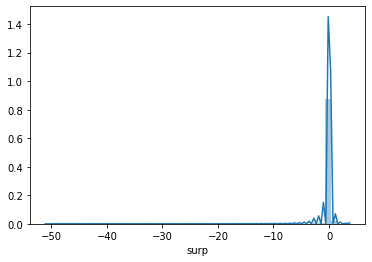

In [29]:
%matplotlib inline
import seaborn as sns
sns.distplot(EPS['surp'])

In [30]:
EPS.describe()

,Actual,Estimate,no_days,surp
count,500.000000,500.000000,500.0,500.000000
mean,8.337980,8.257890,61.0,-0.042647
std,151.446505,151.959465,0.0,2.309797
min,-0.580000,-0.552000,61.0,-51.000000
25%,0.680000,0.658500,61.0,0.002659
50%,1.130000,1.055500,61.0,0.042448
75%,1.840000,1.713750,61.0,0.111111
max,3387.560000,3399.097000,61.0,3.666667
